## Download do dataset - ASL Alphabet

In [16]:
import kagglehub # Para download de datasets do kaggle
import os

# Download do dataset do alfabeto em libras
path = kagglehub.dataset_download("grassknoted/asl-alphabet")
print ("Download feito em: ", path)

# Imprimindo arvore de diretorios do dataset 
for root, dirs, _ in os.walk(path):
    level = root.replace(path, '').count(os.sep)
    indent = ' ' * 4 * level
    print(f"{indent}[DIR] {os.path.basename(root)}")

Download feito em:  /home/diogo/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1
[DIR] 1
    [DIR] asl_alphabet_test
        [DIR] asl_alphabet_test
    [DIR] asl_alphabet_train
        [DIR] asl_alphabet_train
            [DIR] X
            [DIR] M
            [DIR] space
            [DIR] N
            [DIR] Q
            [DIR] H
            [DIR] C
            [DIR] T
            [DIR] nothing
            [DIR] I
            [DIR] A
            [DIR] B
            [DIR] E
            [DIR] W
            [DIR] R
            [DIR] D
            [DIR] Y
            [DIR] L
            [DIR] J
            [DIR] K
            [DIR] F
            [DIR] U
            [DIR] P
            [DIR] O
            [DIR] del
            [DIR] G
            [DIR] Z
            [DIR] V
            [DIR] S


## Extraindo caracteristicas

In [ ]:

import glob
import numpy as np
from lbp import lbp
import skimage

dirs = [
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 
    'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del'
]

X = []
Y = []

for dir in dirs:
    path_dir = (path + "/asl_alphabet_train/asl_alphabet_train/" + dir + '/')
    print(f"Caminho completo: {path_dir}")
    
    for filename in glob.glob(f"{path_dir}*.jpg"):
        img = skimage.io.imread(filename, as_gray=True)
        img *= 255
        img = img.astype(np.uint8)
        features = lbp(img)
        X.append(features.flatten())   
        Y.append(dir)                  

X = np.array(X)
Y = np.array(Y)

np.save("x.knn", X)
np.save("y.knn", Y)

Caminho completo: /home/diogo/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/A/
Caminho completo: /home/diogo/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/B/
Caminho completo: /home/diogo/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/C/
Caminho completo: /home/diogo/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/D/
Caminho completo: /home/diogo/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/E/
Caminho completo: /home/diogo/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/F/
Caminho completo: /home/diogo/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/G/
Caminho completo: /home/diogo/.cache/kagglehub/datasets/grassknoted/a

In [20]:
print("Quantidade de classes: ", len(np.unique(Y)))
print("Rótulos: ", np.unique(Y))
print("Shape de X: ", X.shape)
print("Shape de Y: ", Y.shape)

Quantidade de classes:  27
Rótulos:  ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z' 'del']
Shape de X:  (81000, 59)
Shape de Y:  (81000,)


In [49]:
np.save("x.knn", X)
np.save("y.knn", Y)

## Treinando KNN - Validação cruzada

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

X = np.load("x.knn.npy")
Y = np.load("y.knn.npy")
k=3
kFold=10
metrics = ["euclidean", "manhattan"]
knn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric="euclidean")
scores = cross_val_score(knn, X, Y, cv=kFold, scoring='accuracy')
print(f"Cross validation score with k={k} and k-fold={kFold}")

Cross validation score with k=3 and k-fold=10


In [6]:
print(f"Items por fold: {int(len(X)/kFold)}")
print(f"Acurácia média ({kFold}-fold): {np.mean(scores):.4f}")
print(f"Acurácia mais ALTA: {np.max(scores):.4f}")
print(f"Acurácia mais BAIXA: {np.min(scores):.4f}")
scores_formatados = ", ".join(f"{s:.4f}" for s in scores)
print(f"Acurácias individuais: {scores_formatados}")

Items por fold: 8100
Acurácia média (10-fold): 0.9706
Acurácia mais ALTA: 0.9738
Acurácia mais BAIXA: 0.9678
Acurácias individuais: 0.9707, 0.9733, 0.9716, 0.9678, 0.9732, 0.9681, 0.9683, 0.9738, 0.9696, 0.9696


## Treinando KNN - Otimização de parametros

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = np.load("x.knn.npy")
Y = np.load("y.knn.npy")

X_treino, X_teste, y_treino, y_teste = train_test_split(X, Y, stratify=Y, test_size=0.2, random_state=99)

parametros = []
resultados_val = []

for kn in [1, 3, 5, 7, 9]:
    for md in ["euclidean"]:  # "euclidean" ou "manhattan"
        parametros.append((kn, md))
        knn = KNeighborsClassifier(n_neighbors=kn, metric=md)
        knn.fit(X_treino, y_treino)
        pred_val = knn.predict(X_teste)
        acc_val = accuracy_score(y_teste, pred_val)
        resultados_val.append(acc_val)
        print("Combinação %s: %.2f" % (parametros[-1], resultados_val[-1]))


Combinação (1, 'euclidean'): 0.96
Combinação (3, 'euclidean'): 0.96
Combinação (5, 'euclidean'): 0.96
Combinação (7, 'euclidean'): 0.96
Combinação (9, 'euclidean'): 0.96


In [ ]:
idx_maior = np.argmax(resultados_val)
melhores_parametros = parametros[idx_maior]
melhor_k, melhor_md = melhores_parametros

print("Melhor combinação de parâmetros: k=%d, métrica=%s" % (melhor_k, melhor_md))

Melhor combinação de parâmetros: k=3, métrica=euclidean


In [13]:
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=melhor_k, metric=melhor_md)
knn.fit(X_treino, y_treino)
pred_melhor_param = knn.predict(X_teste)

print(classification_report(y_teste, pred_melhor_param))

              precision    recall  f1-score   support

           A       0.97      0.98      0.97       600
           B       0.97      0.98      0.97       600
           C       0.99      1.00      1.00       600
           D       0.98      0.98      0.98       600
           E       0.98      0.97      0.97       600
           F       0.99      0.99      0.99       600
           G       1.00      0.99      0.99       600
           H       0.99      0.99      0.99       600
           I       0.97      0.98      0.97       600
           J       0.99      0.99      0.99       600
           K       0.99      0.98      0.99       600
           L       0.98      0.99      0.98       600
           M       0.98      0.98      0.98       600
           N       0.96      0.98      0.97       600
           O       0.98      0.98      0.98       600
           P       1.00      1.00      1.00       600
           Q       1.00      0.99      1.00       600
           R       0.88    

### Matriz de Confusão - Otimização de Hiperparametros

Imprimindo matriz de confusão dos resultados da validação cruzada

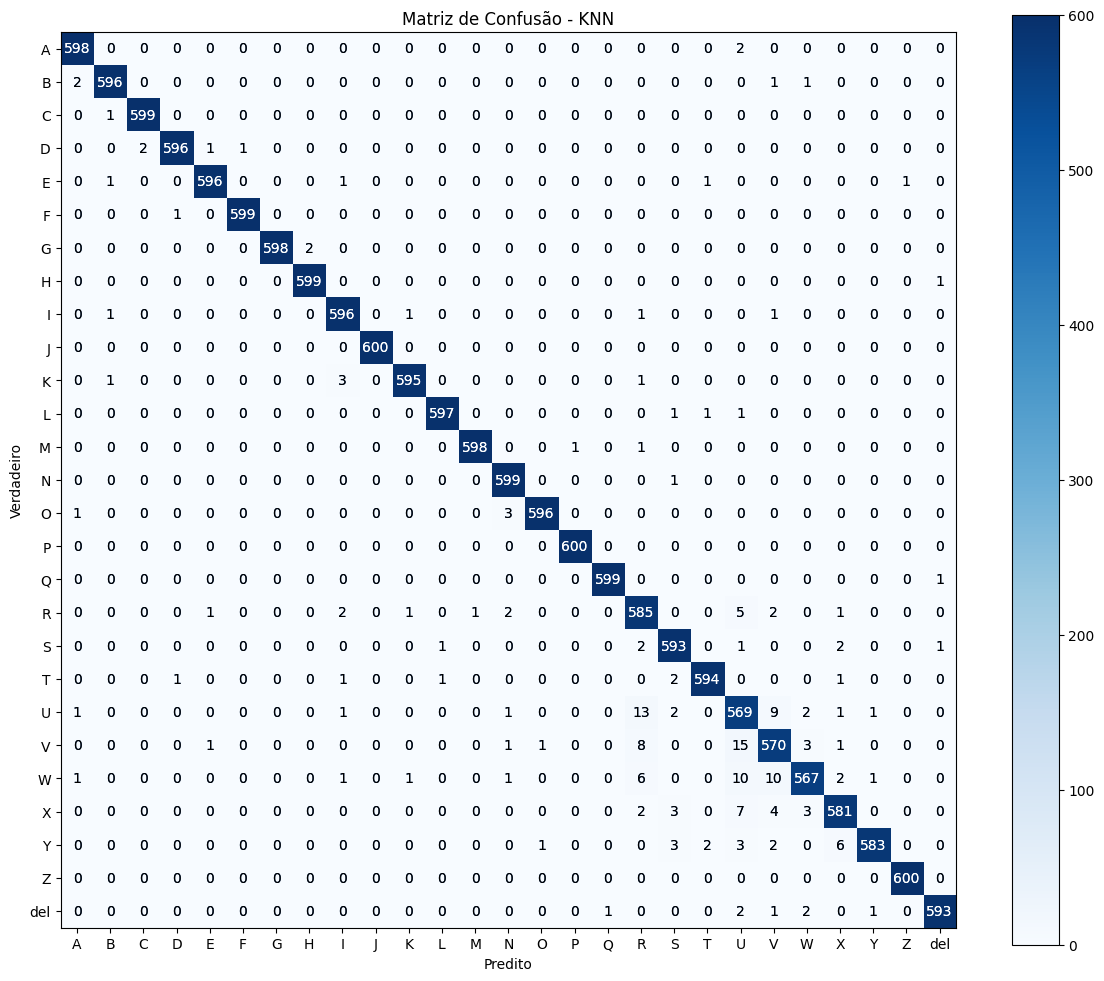

In [90]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay,  confusion_matrix

confmat = confusion_matrix(y_teste, pred_melhor_param)

plt.figure(figsize=(12, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=confmat, display_labels=knn.classes_)
disp.plot(cmap="Blues", ax=plt.gca(), colorbar=True)

plt.title("Matriz de Confusão - KNN")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")

thresh = confmat.max() / 2

for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        value = confmat[i, j]
        color = "white" if value > thresh else "black"
        plt.text(j, i, f"{value:,}", ha='center', va='center', color=color, fontsize=10)

plt.tight_layout()
plt.show()
